## 必要なモジュールをインポートする

In [1]:
import pandas as pd
import kmapper as km
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [9]:
df = pd.read_csv("board_shape.csv", index_col=0)
shape = df.iloc[:,0]
df_board = df.drop(df.columns[[0]], axis=1)
df_board

,LENGTH,R LENGTH,WIDTH,TAPER,max Radius,min Radius,SETBACK
MODEL,,,,,,,
RAVINE SELECT,-0.184240,0.250200,0.179321,0.234027,-0.715144,-0.232049,-0.106366
RAVINE,-0.184240,0.250200,0.179321,0.234027,-0.715144,-0.232049,-0.106366
STALE FISH,-0.552720,0.044748,0.416865,1.095846,-2.475570,0.101650,-0.106366
SERVICE DOG,0.552720,0.006367,0.472460,1.559087,-0.189303,-0.668424,0.136091
UPRISE SPLIT,-0.921199,0.128284,0.027697,-0.486806,0.302245,0.910227,0.136091
...,...,...,...,...,...,...,...
ESSENTIAL,-0.184240,0.466941,0.103509,-0.561009,0.153637,0.743377,-0.217896
GREMLIN,-0.184240,-0.210374,0.381486,0.711049,-0.989496,-0.540078,1.629622
HYPER,-0.552720,0.354055,0.027697,0.075020,0.039324,0.615032,1.013783


In [3]:
pca = PCA()  # PCA を行ったり PCA の結果を格納したりするための変数を、pca として宣言
pca.fit(df_board)  # PCA を実行

PCA()

In [4]:
# 各主成分がどのように構成されるか
loadings = pd.DataFrame(pca.components_.T, index=df_board.columns)
loadings

,0,1,2,3,4,5,6
LENGTH,-0.003550,0.568906,0.229164,0.607525,-0.394294,0.236772,0.207850
R LENGTH,-0.482599,0.372183,-0.030000,-0.097102,-0.007412,-0.770991,0.154165
WIDTH,-0.292208,-0.548618,0.196387,0.468702,-0.325602,-0.233713,-0.441300
TAPER,0.425045,-0.324089,0.523515,0.020399,-0.031405,-0.330324,0.574211
max Radius,-0.285974,0.121696,0.641530,0.064993,0.655493,0.162851,-0.177295
min Radius,-0.409987,-0.061605,0.360398,-0.572156,-0.510662,0.312265,0.112165
SETBACK,0.501164,0.336459,0.304139,-0.264199,-0.216859,-0.248488,-0.603783


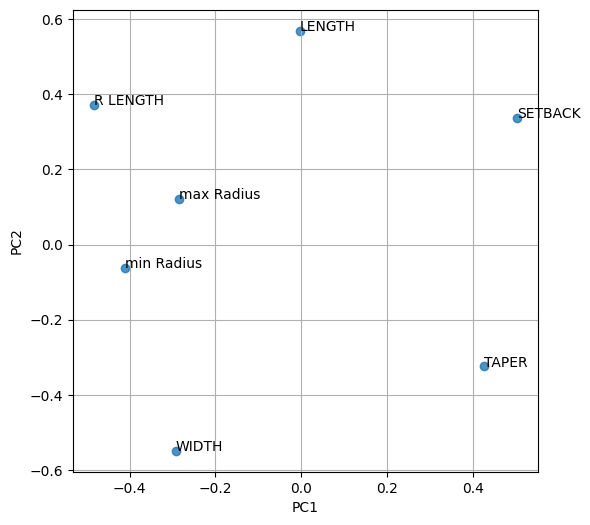

In [5]:
# 第一主成分と第二主成分における観測変数の寄与度をプロットする
plt.figure(figsize=(6, 6))
for x, y, name in zip(pca.components_[0], pca.components_[1], df_board.columns[0:]):
    plt.text(x, y, name)
plt.scatter(pca.components_[0], pca.components_[1], alpha=0.8)
plt.grid()
plt.xlabel("PC1")
plt.ylabel("PC2")
#plt.savefig("PCA_kiyo.png")
plt.show()

In [6]:
# 各主成分に対するサンプルの値
score = pd.DataFrame(pca.transform(df_board), index=df_board.index)
score

,0,1,2,3,4,5,6
MODEL,,,,,,,
RAVINE SELECT,0.173324,-0.294441,-0.466760,0.066987,-0.322153,-0.518232,0.220510
RAVINE,0.173324,-0.294441,-0.466760,0.066987,-0.322153,-0.518232,0.220510
STALE FISH,0.937308,-1.224959,-1.056314,-0.313349,-1.604105,-0.969757,0.851829
SERVICE DOG,0.915975,-0.383738,0.714512,0.922604,-0.233040,-0.772835,0.679032
UPRISE SPLIT,-0.665058,-0.307261,0.098968,-1.106160,0.072332,0.136947,-0.497107
...,...,...,...,...,...,...,...
ESSENTIAL,-0.951305,0.093591,-0.029394,-0.477975,-0.178554,0.068789,-0.146421
GREMLIN,1.614039,-0.161690,0.077451,-0.084040,-0.798548,-0.940190,-0.699867
HYPER,0.099560,0.085813,0.462643,-0.972837,-0.304209,-0.488551,-0.579537


In [7]:
# 寄与率を算出
contribution_ratios = pd.DataFrame(pca.explained_variance_ratio_)
contribution_ratios

,0
0,0.265121
1,0.203866
2,0.172171
3,0.122822
4,0.099879
5,0.084667
6,0.051475


In [10]:
s1 = score.iloc[:,0]
s2 = score.iloc[:,1]
pca_1_2 = pd.concat([s1, s2], axis=1)
pca_1_2 = pd.concat([pca_1_2, shape], axis=1)
pca_1_2

,0,1,SHAPE
MODEL,,,
RAVINE SELECT,0.173324,-0.294441,-0.862662
RAVINE,0.173324,-0.294441,-0.862662
STALE FISH,0.937308,-1.224959,-0.862662
SERVICE DOG,0.915975,-0.383738,-0.862662
UPRISE SPLIT,-0.665058,-0.307261,-0.862662
...,...,...,...
ESSENTIAL,-0.951305,0.093591,1.293993
GREMLIN,1.614039,-0.161690,-0.862662
HYPER,0.099560,0.085813,-0.862662


In [11]:
def cluster(data):
    d = data.iat[0,2]
    dt = data.iat[5,2]
    t = data.iat[9,2]
    directional_x = []
    directional_y = []
    directional_twin_x = []
    directional_twin_y =[]
    twin_x = []
    twin_y = []
    for i in range(100):
        if data.iat[i,2] == d:
            directional_x += [data.iat[i,0]]
            directional_y += [data.iat[i,1]]
        elif data.iat[i,2] == dt:
            directional_twin_x += [data.iat[i,0]]
            directional_twin_y += [data.iat[i,1]]
        else:
            twin_x += [data.iat[i,0]]
            twin_y += [data.iat[i,1]]
    return directional_x, directional_y, directional_twin_x, directional_twin_y, twin_x, twin_y

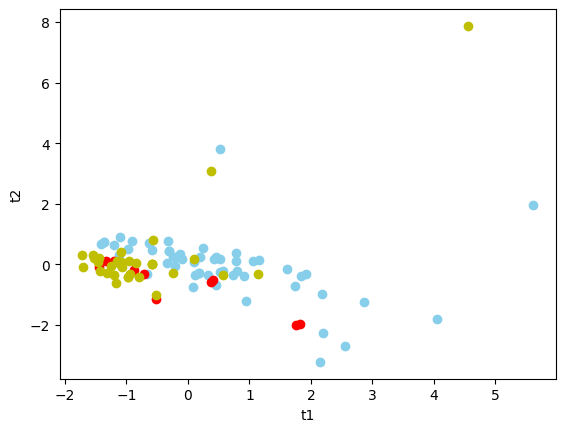

In [12]:
d_x, d_y, dt_x, dt_y, t_x, t_y = cluster(pca_1_2)
plt.scatter(d_x, d_y, c='skyblue')
plt.scatter(dt_x, dt_y, c='r')
plt.scatter(t_x, t_y, c='y')
plt.xlabel('t1')
plt.ylabel('t2')
#plt.savefig("PCA_multi_less_variable.png")
plt.show()